In [33]:
import sys
sys.path.append('..')

import uproot

import numpy as np
import pandas as pd
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.measure import label, regionprops
from scipy.ndimage import label as scipy_label
from collections import deque
from matplotlib.patches import Rectangle

from lariat import Event

In [34]:
TRAINING = '/Users/user/data/research/proton-deuteron/ssvd/handpicked_d.pkl'
CANDIDATES = '/Users/user/data/research/proton-deuteron/ssvd/deuteron_candidates_clean.pkl'
OUT_CSV  = "deuteron_scores.csv"

In [35]:
train = pd.read_pickle(TRAINING)

In [36]:
candidates = pd.read_pickle(CANDIDATES)

In [37]:
scores = pd.read_csv(OUT_CSV)

In [38]:
scores.columns

Index(['event_idx', 'run', 'subrun', 'event', 'cluster_idx', 'svdd_distance',
       'is_deuteron_pred'],
      dtype='object')

In [39]:
scores = pd.merge(
    candidates,
    scores,
    on=['event_idx', 'run', 'subrun', 'event', 'cluster_idx'],
    how='left'
)

In [40]:
true = scores[scores['is_deuteron_pred'] == True]; print(true.shape)
false = scores[scores['is_deuteron_pred'] == False]; print(false.shape)

(896, 32)
(3648, 32)


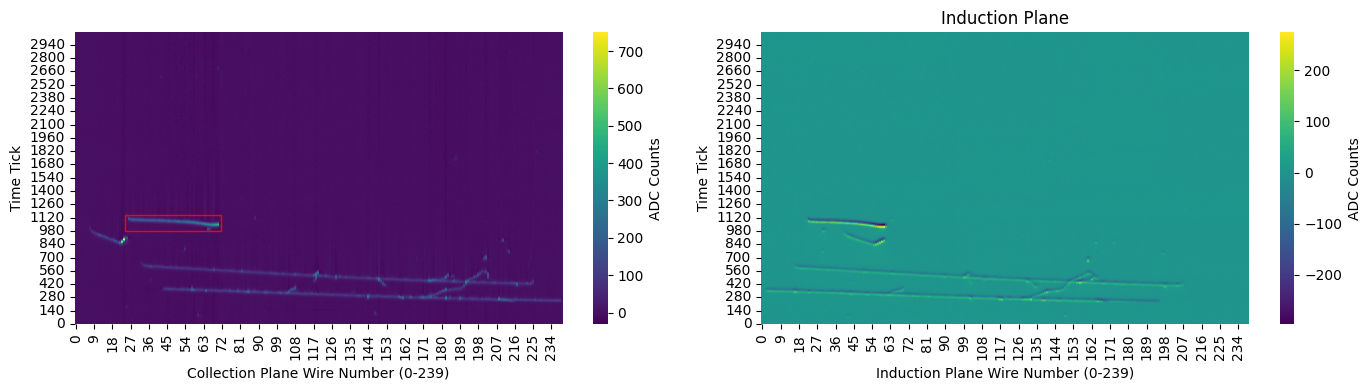

In [58]:
g = true.sample(n=1)

i = 0

row = g.iloc[i]
event = Event(g.iloc[i]['file_path'], index=g.iloc[i]['event_index'], plot=False)

c = event.collection
a = event.induction

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.heatmap(c.T, cmap="viridis", cbar_kws={'label': 'ADC Counts'}, ax=ax1)
ax1.set_xlabel("Collection Plane Wire Number (0-239)")
ax1.set_ylabel("Time Tick")
# ax1.set_title(f"Collection Plane - Beamline Mass: {row['beamline_mass']:.2f}")
ax1.invert_yaxis()

start_wire = row['bbox_min_row'] 
start_time = row['bbox_min_col']
width = row['height']
height = row['width']

rect = Rectangle((start_wire, start_time), 
                    width, height, 
                    linewidth=1, 
                    edgecolor='red', 
                    facecolor='none')
ax1.add_patch(rect)

sns.heatmap(a.T, cmap='viridis', cbar_kws={'label': 'ADC Counts'}, ax=ax2)
ax2.set_xlabel("Induction Plane Wire Number (0-239)")
ax2.set_ylabel("Time Tick")
ax2.set_title("Induction Plane")
ax2.invert_yaxis()

# row = g.iloc[i+1]

# start_wire = row['bbox_min_row'] 
# start_time = row['bbox_min_col']
# width = row['height']
# height = row['width']

# rect = Rectangle((start_wire, start_time), 
#                     width, height, 
#                     linewidth=1, 
#                     edgecolor='red', 
#                     facecolor='none')
# ax2.add_patch(rect)

plt.tight_layout()

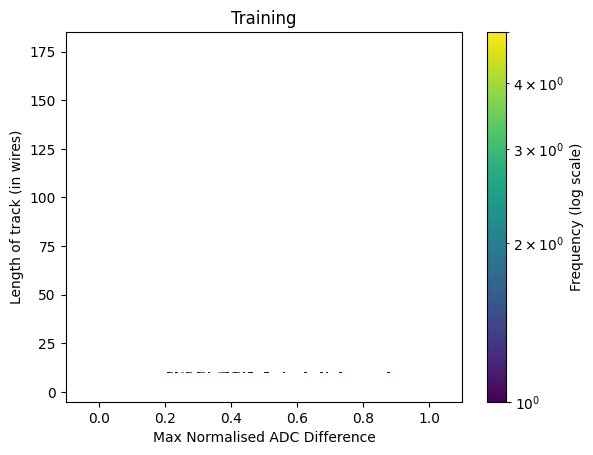

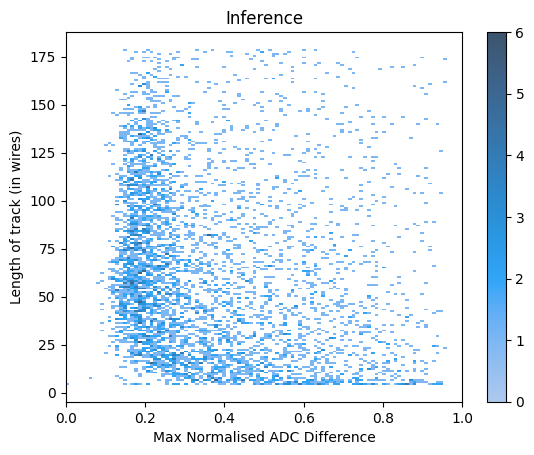

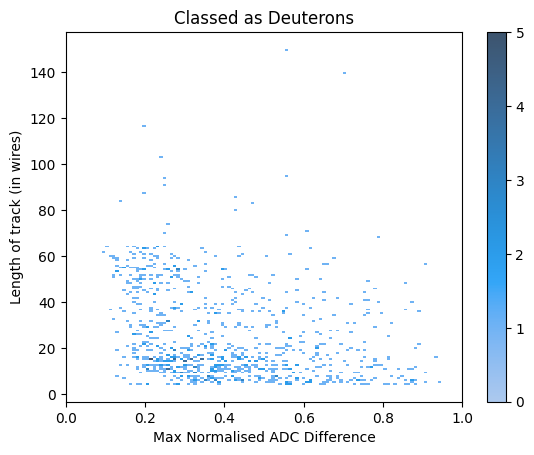

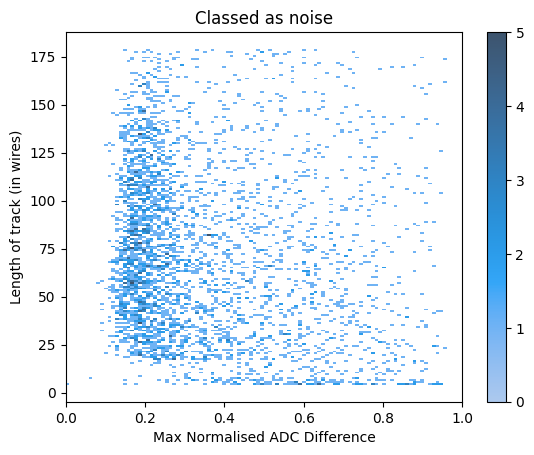

In [42]:
from matplotlib.colors import LogNorm

plt.figure()
h = plt.hist2d(train['maxdiff'], train['lengths'], bins=[100, 176], norm=LogNorm(), cmap='viridis')
plt.xlabel('Max Normalised ADC Difference')
plt.ylabel('Length of track (in wires)')
plt.ylim(-5, 185)
plt.xlim(-0.1,1.1)
plt.title('Training')
plt.colorbar(label='Frequency (log scale)')
plt.show()

plt.figure()
sns.histplot(data=scores, x='maxdiff', y='height',  bins=[100, 176], cbar=True)
plt.xlabel('Max Normalised ADC Difference')
plt.ylabel('Length of track (in wires)')
plt.xlim(0, 1)
plt.title('Inference')
plt.show()

plt.figure()
sns.histplot(data=true, x='maxdiff', y='height', bins=[100, 176], cbar=True)
plt.xlabel('Max Normalised ADC Difference')
plt.ylabel('Length of track (in wires)')
plt.xlim(0, 1)
plt.title('Classed as Deuterons')
plt.show()

plt.figure()
sns.histplot(data=false, x='maxdiff', y='height', bins=[100, 176], cbar=True)
plt.xlabel('Max Normalised ADC Difference')
plt.ylabel('Length of track (in wires)')
plt.xlim(0, 1)
plt.title('Classed as noise')
plt.show()